<a href="https://colab.research.google.com/github/Bettenoch/security_incidence_prediction/blob/main/Security_Incidence_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving security_incidents_2025-03-12.csv to security_incidents_2025-03-12.csv


In [5]:
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Security-Incidences-Analysis-main.zip
/content/security_incidents_2025-03-12.csv
/content/.config/active_config
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/logs/2025.04.07/13.42.24.146310.log
/content/.config/logs/2025.04.07/13.42.34.302585.log
/content/.config/logs/2025.04.07/13.42.43.503346.log
/content/.config/logs/2025.04.07/13.42.44.251076.log
/content/.config/logs/2025.04.07/13.42.02.070730.log
/content/.config/logs/2025.04.07/13.42.32.824024.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/cal

In [6]:
import pandas as pd
import numpy as np

si= pd.read_csv("/content/security_incidents_2025-03-12.csv")

si.iloc[:20]

,Incident ID,Year,Month,Day,Country Code,Country,Region,District,City,UN,...,Attack context,Location,Latitude,Longitude,Motive,Actor type,Actor name,Details,Verified,Source
0,#event+id,#date+year,#date+month,#date+day,#country+code,#country+name+i_en,#adm1+name+i_en,#adm2+name+i_en,#adm3+name+i_en,#affected+UN,...,#event+type+i_en,#loc+type+i_en,#geo+lat,#geo+lon,#x_event_motive,#group+type+i_en,#group+name+i_en,#description+i_en,NaN,NaN
1,35,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,Unknown,Unknown,NaN,NaN,Unknown,Unknown,Unknown,1 ICRC international staff wounded and 1 natio...,Yes,Focal Point
2,1,1997,1,NaN,KH,Cambodia,Banteay Meanchey,NaN,NaN,0,...,Unknown,Unknown,14.07092855,103.099916,Unknown,Unknown,Unknown,1 ICRC national staff killed while working in ...,Archived,Archived
3,2,1997,1,NaN,RW,Rwanda,Northern,Musanze,Ruhengeri,0,...,Raid,Office/compound,-1.49984,29.63497,Unknown,Unknown,Unknown,"3 INGO international (Spanish) staff killed, 1...",Archived,Archived
4,3,1997,2,NaN,TJ,Tajikistan,NaN,NaN,NaN,4,...,Unknown,Unknown,38.6281733,70.8156541,NaN,Unknown,Unknown,"3 UN national staff, 1 UN international (Niger...",Archived,Archived
5,4,1997,2,NaN,SO,Somalia,Lower Juba,Kismayo,Kismayo,0,...,Unknown,Unknown,-0.358216,42.545087,Political,Non-state armed group: Regional,Al-Itihaad al-Islamiya,1 INGO international staff killed by Al ittiha...,Archived,Archived
6,5,1997,2,14,RW,Rwanda,Kigali,Kigali,Kigali,1,...,Individual attack,Unknown,-1.9508511,30.0615075,Political,Unknown,Unknown,1 UN national staff shot and killed in Kigali ...,Archived,Archived
7,7,1997,5,NaN,CD,DR Congo,NaN,NaN,NaN,0,...,Combat/Crossfire,Unknown,-2.9814344,23.8222636,Incidental,Non-state armed group: National,Alliance of Democratic Forces for the Liberati...,10 NRCS staff first aid workers killed in figh...,Archived,Archived
8,6,1997,5,7,SL,Sierra Leone,NaN,NaN,NaN,3,...,Ambush,Road,8.6400349,-11.8400269,Unknown,Unknown,Unknown,1 UN national staff driver killed and 2 UN nat...,Archived,Archived
9,11,1997,6,NaN,SO,Somalia,Gedo,Baardheere,Tulo-Burago,1,...,Ambush,Road,2.25,41.16667,Incidental,Non-state armed group: Regional,Al-Itihaad al-Islamiya,1 UN national staff beheaded by Al-Ittihad mil...,Yes,Focal Point


In [7]:
si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Incident ID               4336 non-null   object
 1   Year                      4336 non-null   object
 2   Month                     4287 non-null   object
 3   Day                       3955 non-null   object
 4   Country Code              4302 non-null   object
 5   Country                   4330 non-null   object
 6   Region                    3968 non-null   object
 7   District                  3599 non-null   object
 8   City                      3347 non-null   object
 9   UN                        4336 non-null   object
 10  INGO                      4336 non-null   object
 11  ICRC                      4327 non-null   object
 12  NRCS and IFRC             4327 non-null   object
 13  NNGO                      4327 non-null   object
 14  Other                   

In [8]:
#check for null values
print(si.isnull().sum())

Incident ID                   0
Year                          0
Month                        49
Day                         381
Country Code                 34
Country                       6
Region                      368
District                    737
City                        989
UN                            0
INGO                          0
ICRC                          9
NRCS and IFRC                 9
NNGO                          9
Other                         0
Nationals killed              0
Nationals wounded             0
Nationals kidnapped           0
Total nationals               0
Internationals killed         0
Internationals wounded        0
Internationals kidnapped      0
Total internationals          0
Total killed                  0
Total wounded                 0
Total kidnapped               0
Total affected                0
Gender Male                   0
Gender Female                 0
Gender Unknown                0
Means of attack               0
Attack c

In [9]:
print (si.columns.tolist())

['Incident ID', 'Year', 'Month', 'Day', 'Country Code', 'Country', 'Region', 'District', 'City', 'UN', 'INGO', 'ICRC', 'NRCS and IFRC', 'NNGO', 'Other', 'Nationals killed', 'Nationals wounded', 'Nationals kidnapped', 'Total nationals', 'Internationals killed', 'Internationals wounded', 'Internationals kidnapped', 'Total internationals', 'Total killed', 'Total wounded', 'Total kidnapped', 'Total affected', 'Gender Male', 'Gender Female', 'Gender Unknown', 'Means of attack', 'Attack context', 'Location', 'Latitude', 'Longitude', 'Motive', 'Actor type', 'Actor name', 'Details', 'Verified', 'Source']


In [10]:
# we drop the first row since it contains metadata

# option 1
if si.iloc[0, 0] == "#event+id":
    si = si.iloc[1:].reset_index(drop=True)

# rename columns
si.columns = [
    "incident_id", "year", "month", "day", "country_code", "country", "region", "district", "city",
    "UN", "INGO", "ICRC", "NRCS_IFRC", "NNGO", "other",
    "nationals_killed", "nationals_wounded", "nationals_kidnapped", "total_nationals",
    "internationals_killed", "internationals_wounded", "internationals_kidnapped", "total_internationals",
    "total_killed", "total_wounded", "total_kidnapped", "total_affected",
    "gender_male", "gender_female", "gender_unknown",
    "means_of_attack", "attack_context", "location", "latitude", "longitude",
    "motive", "actor_type", "actor_name", "details", "verified", "source"
]


si.head()

,incident_id,year,month,day,country_code,country,region,district,city,UN,...,attack_context,location,latitude,longitude,motive,actor_type,actor_name,details,verified,source
0,35,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,Unknown,Unknown,NaN,NaN,Unknown,Unknown,Unknown,1 ICRC international staff wounded and 1 natio...,Yes,Focal Point
1,1,1997,1,NaN,KH,Cambodia,Banteay Meanchey,NaN,NaN,0,...,Unknown,Unknown,14.07092855,103.099916,Unknown,Unknown,Unknown,1 ICRC national staff killed while working in ...,Archived,Archived
2,2,1997,1,NaN,RW,Rwanda,Northern,Musanze,Ruhengeri,0,...,Raid,Office/compound,-1.49984,29.63497,Unknown,Unknown,Unknown,"3 INGO international (Spanish) staff killed, 1...",Archived,Archived
3,3,1997,2,NaN,TJ,Tajikistan,NaN,NaN,NaN,4,...,Unknown,Unknown,38.6281733,70.8156541,NaN,Unknown,Unknown,"3 UN national staff, 1 UN international (Niger...",Archived,Archived
4,4,1997,2,NaN,SO,Somalia,Lower Juba,Kismayo,Kismayo,0,...,Unknown,Unknown,-0.358216,42.545087,Political,Non-state armed group: Regional,Al-Itihaad al-Islamiya,1 INGO international staff killed by Al ittiha...,Archived,Archived


In [11]:
# the catagerorical data are objects which consume more memory and limit categorical data analysis should convert to specific dtypes
si = si.infer_objects()
numerical_cols = si.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_values = si.select_dtypes(include=['object']).columns.tolist()

numeric_columns = [
    "year", "month", "day","UN", "INGO", "ICRC", "NRCS_IFRC", "NNGO", "other","nationals_killed", "nationals_wounded", "nationals_kidnapped",
    "total_nationals", "internationals_killed", "internationals_wounded", "internationals_kidnapped",
    "total_internationals", "total_killed", "total_wounded", "total_kidnapped", "total_affected",
    "gender_male", "gender_female", "gender_unknown", "latitude", "longitude"
]
si[numeric_columns] = si[numeric_columns].apply(pd.to_numeric, errors='coerce')


#convert Y/M/D to date column

si['date'] = pd.to_datetime(si[['year', 'month', 'day']], errors='coerce')

si.info()
si.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   incident_id               4335 non-null   object        
 1   year                      4335 non-null   int64         
 2   month                     4286 non-null   float64       
 3   day                       3954 non-null   float64       
 4   country_code              4301 non-null   object        
 5   country                   4329 non-null   object        
 6   region                    3967 non-null   object        
 7   district                  3598 non-null   object        
 8   city                      3346 non-null   object        
 9   UN                        4335 non-null   int64         
 10  INGO                      4335 non-null   int64         
 11  ICRC                      4326 non-null   float64       
 12  NRCS_IFRC           

,incident_id,year,month,day,country_code,country,region,district,city,UN,...,location,latitude,longitude,motive,actor_type,actor_name,details,verified,source,date
0,35,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,Unknown,NaN,NaN,Unknown,Unknown,Unknown,1 ICRC international staff wounded and 1 natio...,Yes,Focal Point,NaT
1,1,1997,1.0,NaN,KH,Cambodia,Banteay Meanchey,NaN,NaN,0,...,Unknown,14.070929,103.099916,Unknown,Unknown,Unknown,1 ICRC national staff killed while working in ...,Archived,Archived,NaT
2,2,1997,1.0,NaN,RW,Rwanda,Northern,Musanze,Ruhengeri,0,...,Office/compound,-1.499840,29.634970,Unknown,Unknown,Unknown,"3 INGO international (Spanish) staff killed, 1...",Archived,Archived,NaT
3,3,1997,2.0,NaN,TJ,Tajikistan,NaN,NaN,NaN,4,...,Unknown,38.628173,70.815654,NaN,Unknown,Unknown,"3 UN national staff, 1 UN international (Niger...",Archived,Archived,NaT
4,4,1997,2.0,NaN,SO,Somalia,Lower Juba,Kismayo,Kismayo,0,...,Unknown,-0.358216,42.545087,Political,Non-state armed group: Regional,Al-Itihaad al-Islamiya,1 INGO international staff killed by Al ittiha...,Archived,Archived,NaT


In [12]:
# fix missing values

# filled null month and day using median per year

si['month'] = si.groupby("year")["month"].transform(lambda x: x.fillna(x.median()))
si["day"] = si.groupby(["year", "month"])["day"].transform(lambda x: x.fillna(x.median()))
si["day"] = si["day"].fillna(si["day"].mode()[0] if not si["day"].mode().empty else 15)
# if missing dates
si['date'] = pd.to_datetime(si[['year', 'month', 'day']], errors='coerce')
si["date"] = si.groupby("country")["date"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "2000"))

si["motive"] = si["motive"].fillna("Unknown")
si["actor_name"] = si["actor_name"].fillna("Unknown")
si["verified"] = si["verified"].fillna("Archived")
# Fill region, district, city based on most frequent value in each country
si["region"] = si.groupby("country")["region"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))
si["district"] = si.groupby("region")["district"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))
si["city"] = si.groupby("district")["city"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

si["country_code"] = si.groupby("country")["country_code"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "1997-01-15"))
#if still missing
si["country_code"] = si.apply(
    lambda row: row["country"][:2].upper() if row["country_code"] == "" else row["country_code"], axis=1
)
# fill missing death officials with 0
si[['ICRC', 'NRCS_IFRC', 'NNGO']] = si[['ICRC', 'NRCS_IFRC', 'NNGO']].fillna(0)

# Fill missing lat/lon using country averages
si["latitude"] = si.groupby("country")["latitude"].transform(lambda x: x.fillna(x.mean()))
si["longitude"] = si.groupby("country")["longitude"].transform(lambda x: x.fillna(x.mean()))

# Drop records where country or year is missing (essential for analysis)
si = si.dropna(subset=["year", "country"])

print(si.isnull().sum())
si.info()

incident_id                 0
year                        0
month                       0
day                         0
country_code                0
country                     0
region                      0
district                    0
city                        0
UN                          0
INGO                        0
ICRC                        0
NRCS_IFRC                   0
NNGO                        0
other                       0
nationals_killed            0
nationals_wounded           0
nationals_kidnapped         0
total_nationals             0
internationals_killed       0
internationals_wounded      0
internationals_kidnapped    0
total_internationals        0
total_killed                0
total_wounded               0
total_kidnapped             0
total_affected              0
gender_male                 0
gender_female               0
gender_unknown              0
means_of_attack             0
attack_context              0
location                    0
latitude  

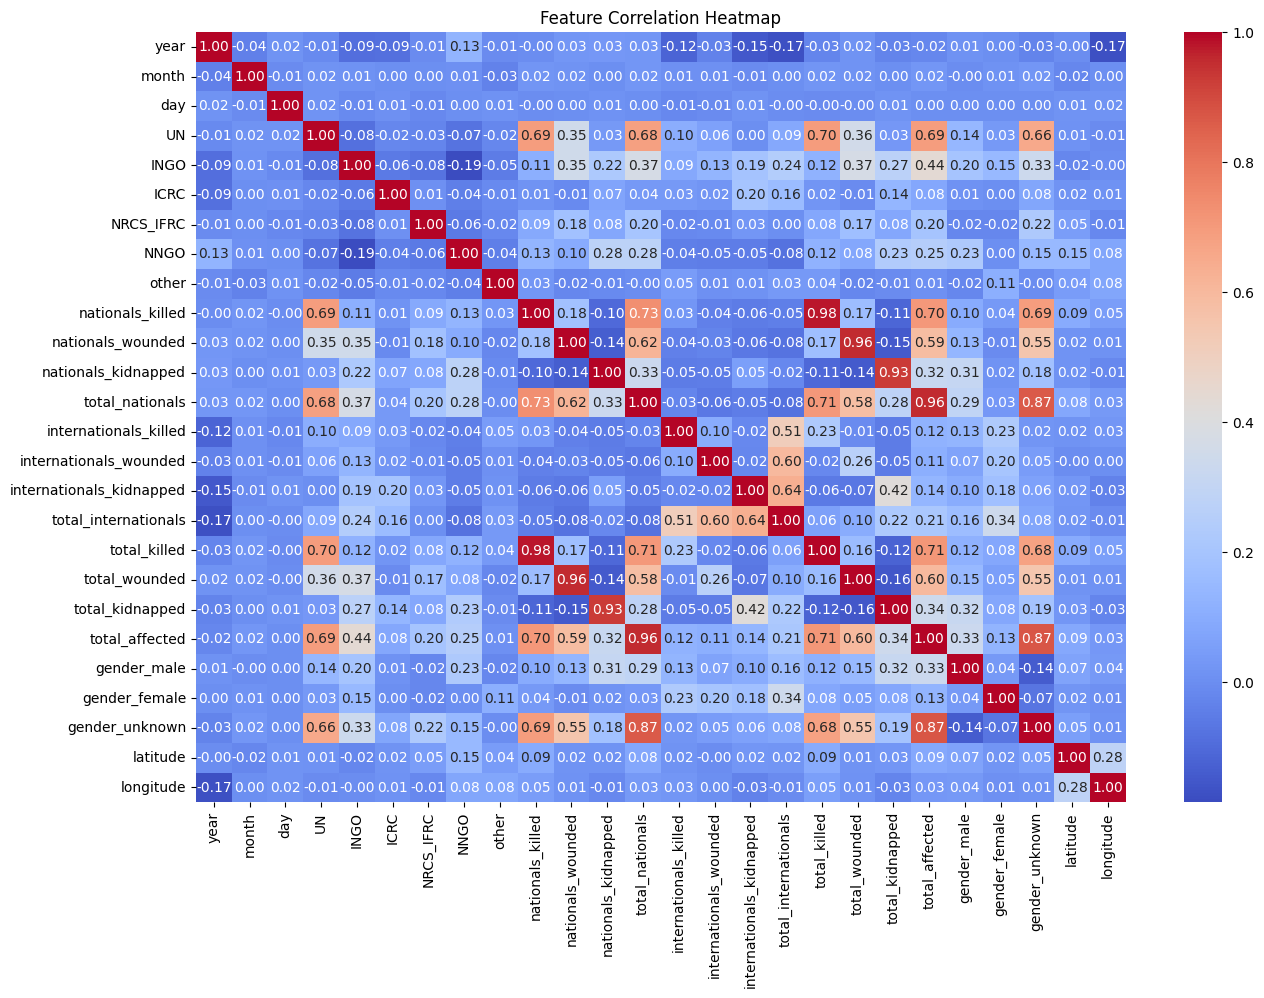

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

si_cat=si.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
sns.heatmap(si_cat.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

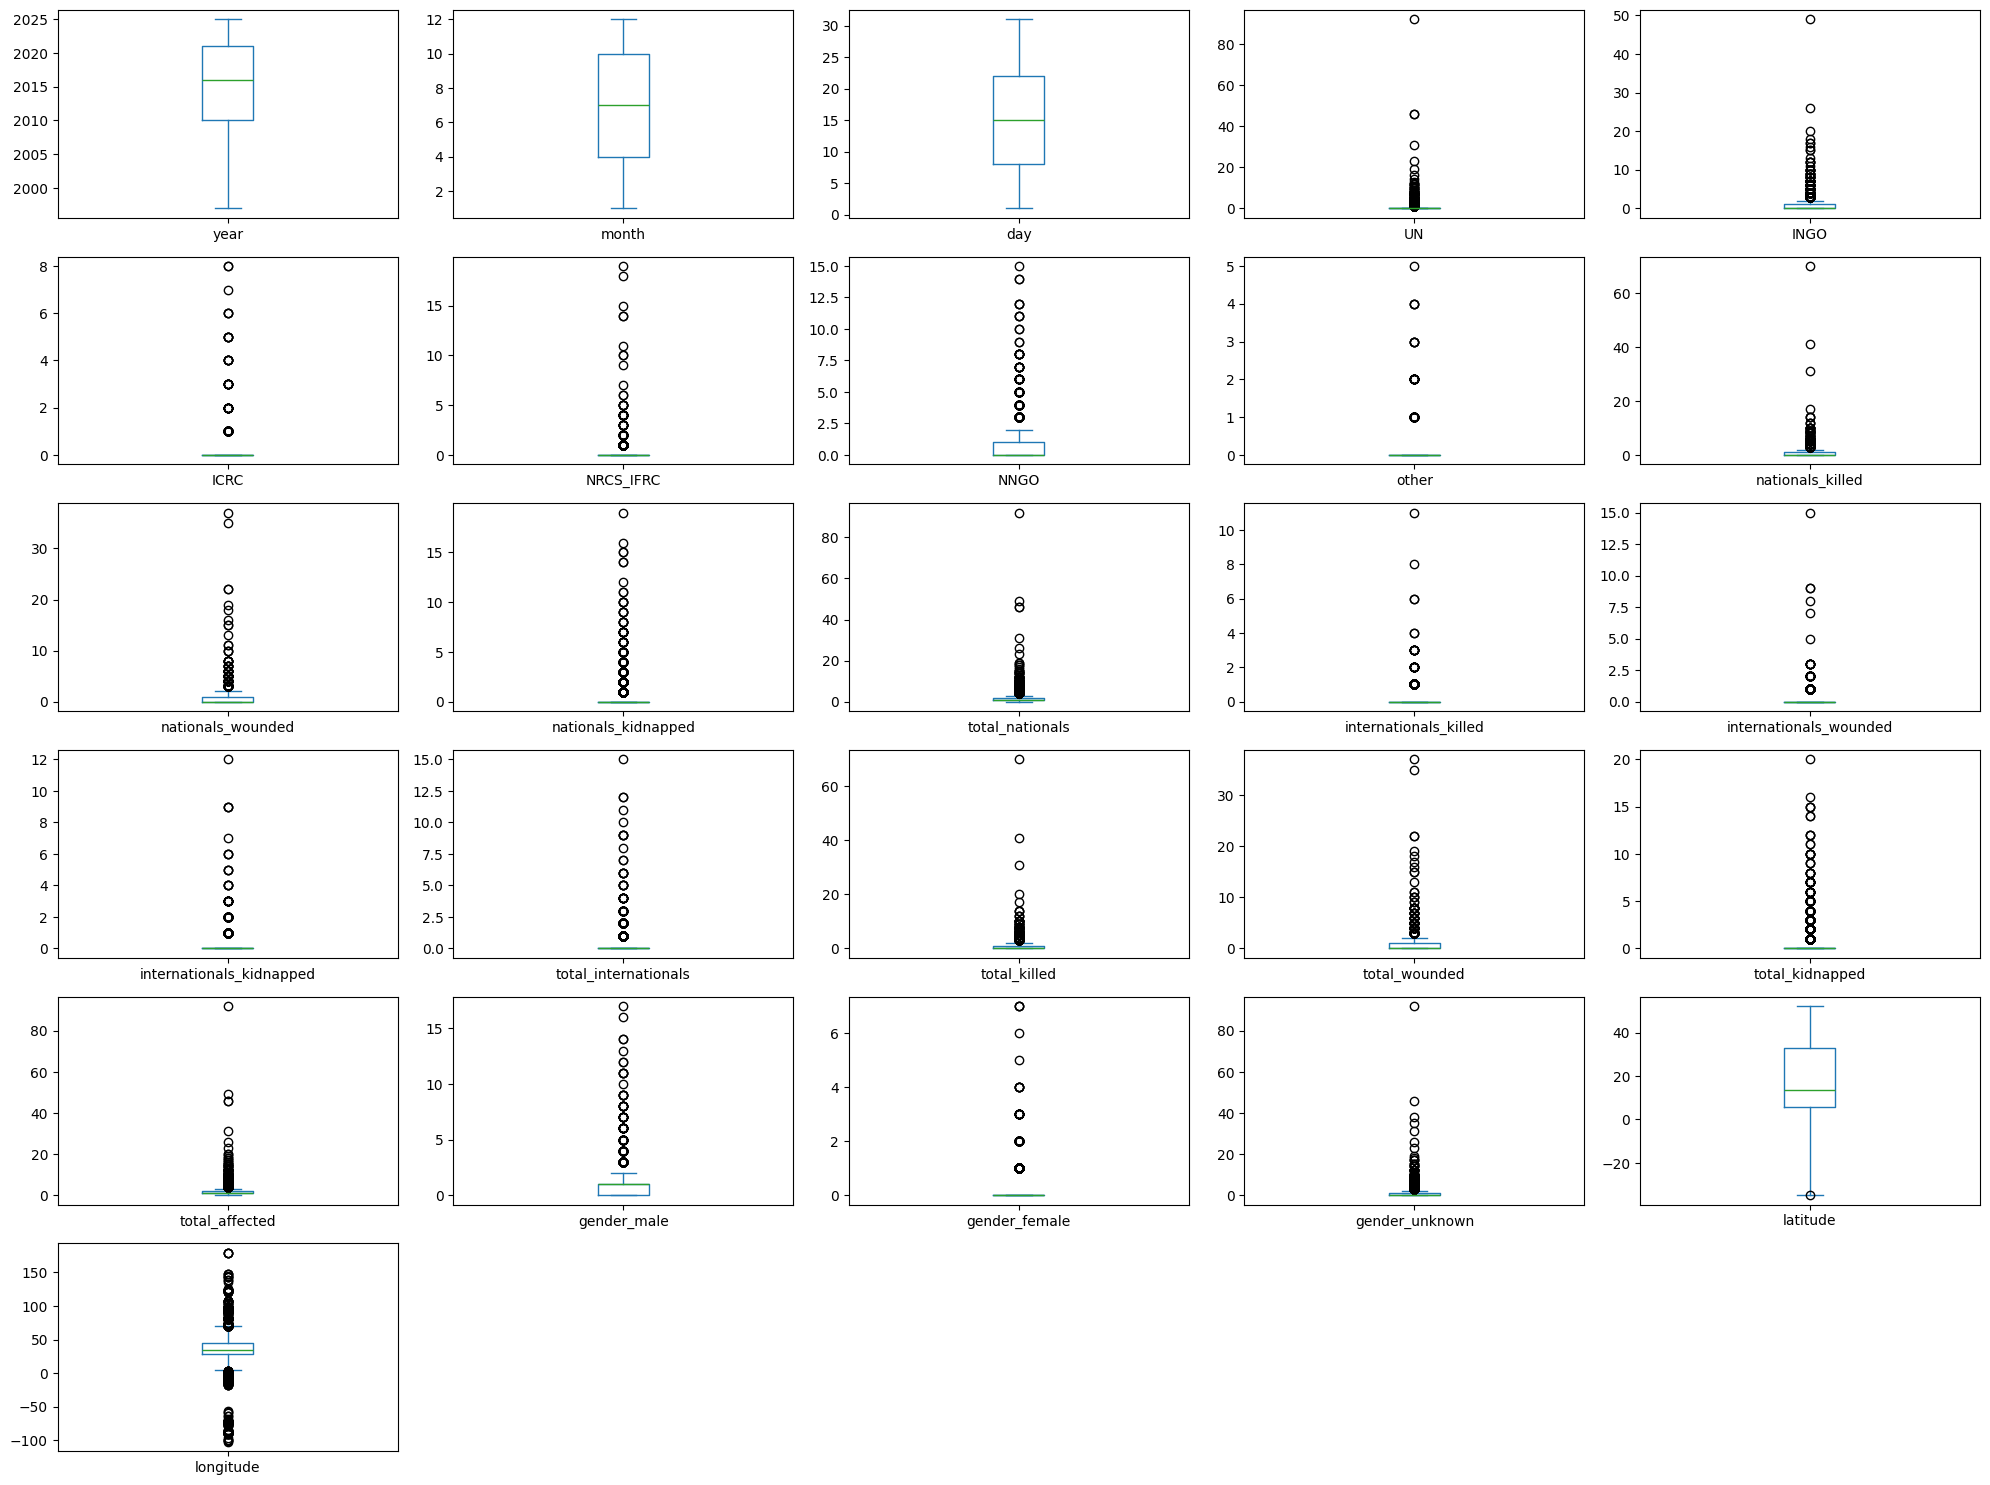

In [14]:
# sns.boxplot(x=si['total_affected'])
#plt.show()
si_cat.plot(kind='box', subplots=True, layout=(6,5), figsize=(20,15), sharex=False)
plt.tight_layout()
plt.show() #check for outliers
